In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import datacube
from deafrica_tools.plotting import rgb,display_map
import odc.algo
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog
import numpy as np
import pandas as pd
import xarray as xr

dc = datacube.Datacube(app="Analysis")

lat_range = (15.75418332, 15.85828652)
lon_range = (80.78694696, 81.02203692)
time_range = ('2019-01-15', '2023-05-15')

ds = dc.load(product="s2a_sen2cor_granule",
                 measurements=["B08_10m","B11_20m","B04_10m","B03_10m","B05_20m","B02_10m"],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs='EPSG:6933',
             resolution=(-30, 30))

print(ds)

<xarray.Dataset>
Dimensions:      (time: 4, y: 427, x: 757)
Coordinates:
  * time         (time) datetime64[ns] 2019-12-17T05:14:23.668570 ... 2023-04...
  * y            (y) float64 1.998e+06 1.998e+06 ... 1.985e+06 1.985e+06
  * x            (x) float64 7.795e+06 7.795e+06 ... 7.817e+06 7.818e+06
    spatial_ref  int32 6933
Data variables:
    B08_10m      (time, y, x) uint16 1951 2561 3061 3361 ... 1273 1194 1133 1304
    B11_20m      (time, y, x) uint16 786 1008 1295 1412 ... 1172 1149 1144 1221
    B04_10m      (time, y, x) uint16 467 488 558 717 718 ... 1704 1602 1531 1646
    B03_10m      (time, y, x) uint16 745 827 908 1073 ... 1971 1868 1793 1980
    B05_20m      (time, y, x) uint16 1009 1168 1291 1536 ... 1528 1477 1425 1603
    B02_10m      (time, y, x) uint16 477 481 578 738 851 ... 1650 1588 1566 1806
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


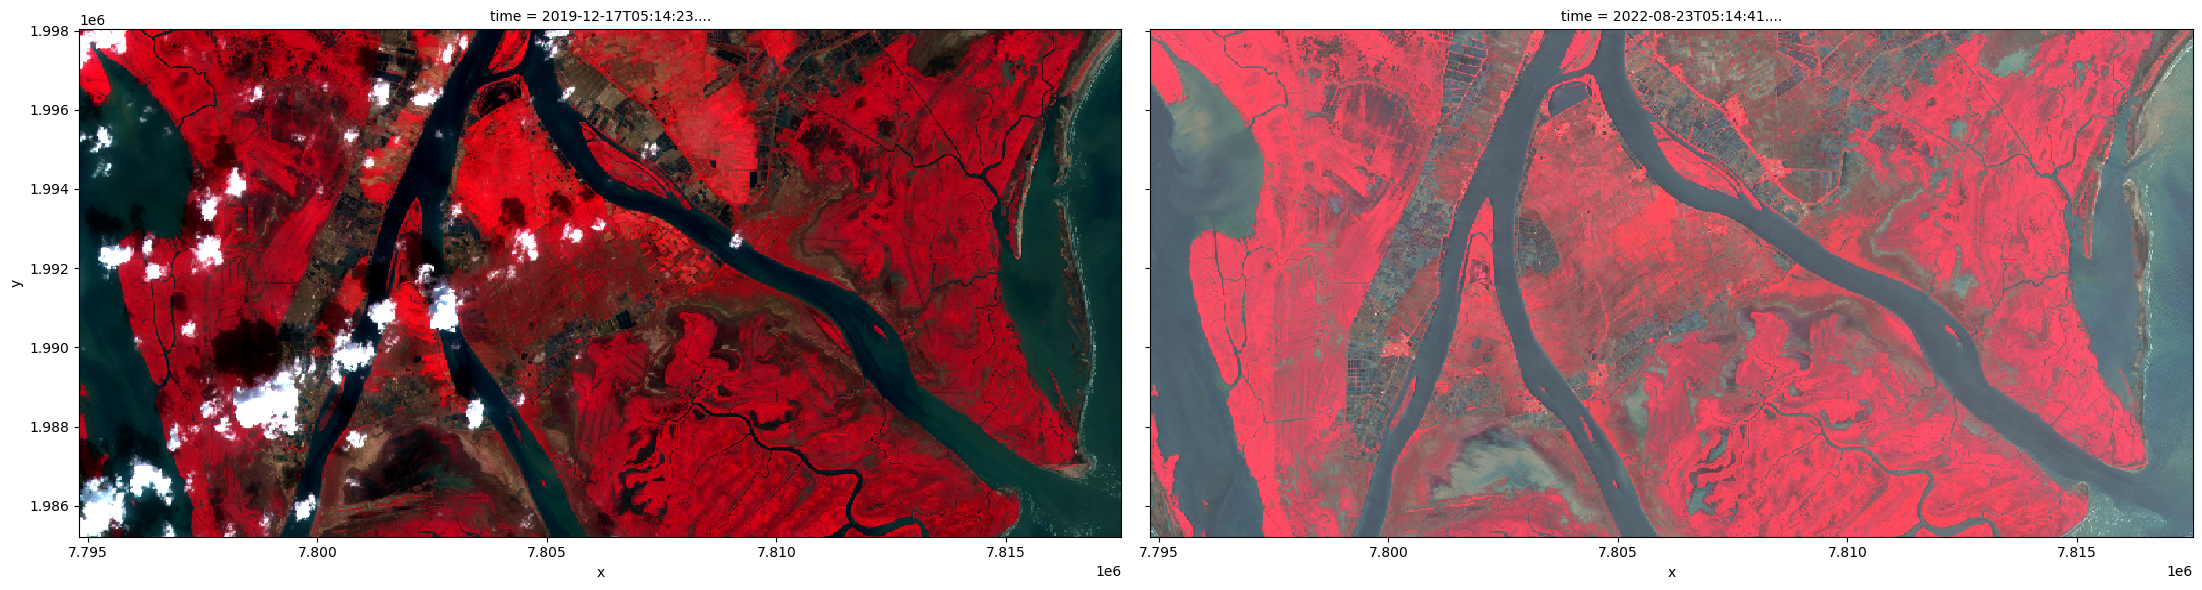

In [2]:
# Load the data from the Datacube
dataset = ds

rgb(ds, bands=['B08_10m', 'B04_10m', 'B03_10m'], index=[0, 1])

In [3]:
# convert dataset to float32 datatype so no-data values are set to NaN
dataset =  odc.algo.to_f32(dataset)

# Calculate the components that make up the NDVI calculation
band_diff = dataset.B08_10m - dataset.B04_10m
band_sum = dataset.B08_10m + dataset.B04_10m

# Calculate NDVI and store it as a measurement in the original dataset
ndvi = band_diff / band_sum
print(ndvi)

<xarray.DataArray (time: 4, y: 427, x: 757)>
array([[[ 6.13730371e-01,  6.79895043e-01,  6.91627502e-01, ...,
         -1.00352587e-02, -1.05708244e-03, -7.45730102e-03],
        [ 6.55126512e-01,  6.88914359e-01,  6.71052635e-01, ...,
         -5.75143797e-03, -7.96178356e-03, -8.73671751e-03],
        [ 6.54148459e-01,  6.08034074e-01,  4.34396595e-01, ...,
         -1.47392293e-02, -1.77414808e-02, -3.14755999e-02],
        ...,
        [-9.56232175e-02, -7.16122687e-02, -1.19179837e-01, ...,
         -3.82636666e-01, -3.82732838e-01, -4.00783300e-01],
        [-9.69720185e-02, -1.10402271e-01, -7.42941126e-02, ...,
         -4.14237291e-01, -3.90275955e-01, -3.95077705e-01],
        [-8.42932612e-02, -5.86258620e-02, -5.94988279e-02, ...,
         -3.98110658e-01, -3.55953902e-01, -4.07407403e-01]],

       [[ 4.74097073e-01,  4.90514040e-01,  4.70815808e-01, ...,
          9.63395461e-02,  8.96694213e-02,  6.52489141e-02],
        [ 4.90107030e-01,  4.86426055e-01,  4.83818233e-01

In [4]:
dataset =  odc.algo.to_f32(dataset)
ndmi = (ds["B08_10m"] - ds["B11_20m"]) / (ds["B08_10m"] + ds["B11_20m"])
print(ndmi)

<xarray.DataArray (time: 4, y: 427, x: 757)>
array([[[4.25648520e-01, 4.35135892e-01, 4.05417815e-01, ...,
         1.58622959e+01, 1.55629630e+01, 1.48828089e+01],
        [4.07701019e-01, 4.25876663e-01, 3.85139741e-01, ...,
         1.51693417e+01, 1.54898834e+01, 1.42025289e+01],
        [4.37753036e-01, 4.11324786e-01, 2.42381088e-01, ...,
         1.58733496e+01, 1.59717236e+01, 1.71241778e+01],
        ...,
        [7.51502298e-02, 1.30707144e-01, 8.97880087e-02, ...,
         5.18987342e-01, 5.28619529e-01, 5.00000000e-01],
        [7.53898821e-02, 4.48175385e-02, 1.18497690e-02, ...,
         4.76923077e-01, 5.23809524e-01, 5.06451613e-01],
        [1.29272165e-01, 1.75923844e-01, 1.53345444e-01, ...,
         5.11864407e-01, 5.62111801e-01, 4.88372093e-01]],

       [[2.81250000e-01, 2.91555431e-01, 2.72594964e-01, ...,
         1.26654376e+01, 2.85225328e-03, 1.42949923e+01],
        [3.00127352e-01, 3.11909796e-01, 2.90221717e-01, ...,
         1.22676531e+01, 1.26848837e+0

In [5]:
# convert dataset to float32 datatype so no-data values are set to NaN
dataset =  odc.algo.to_f32(ds)


# Calculate EVI and store it as a measurement in the original dataset
EVI = 2.5 * ((dataset.B08_10m - dataset.B04_10m) / (dataset.B08_10m + 6 * dataset.B04_10m - 7.5 * dataset.B02_10m + 1))
print(EVI)

<xarray.DataArray (time: 4, y: 427, x: 757)>
array([[[ 3.1534214e+00,  2.7529881e+00,  3.0156627e+00, ...,
         -3.2708630e-02, -3.5149385e-03, -2.3148149e-02],
        [ 3.3131313e+00,  3.0183232e+00,  3.2185116e+00, ...,
         -2.0069808e-02, -2.8446803e-02, -2.8235653e-02],
        [ 3.2831678e+00,  2.9006970e+00,  3.1244087e+00, ...,
         -5.0407134e-02, -6.7466266e-02, -1.2252697e-01],
        ...,
        [ 3.1746033e-01,  1.7763384e-01,  6.2900805e-01, ...,
         -1.2385513e+00, -8.7996250e-01, -1.0045812e+00],
        [ 3.0488050e-01,  3.8607723e-01,  1.5633860e-01, ...,
         -1.0279273e+00, -9.4555879e-01, -1.1050725e+00],
        [ 2.9302302e-01,  1.3406335e-01,  1.2091109e-01, ...,
         -1.0438783e+00, -1.0626911e+00, -1.2591987e+00]],

       [[ 2.2987320e+00,  2.6908021e+00,  2.5321150e+00, ...,
          5.6926751e-01,  6.4544916e-01,  4.7821465e-01],
        [ 2.4733999e+00,  2.4113364e+00,  2.3801866e+00, ...,
          4.9388525e-01,  4.8936683e-0

In [6]:
dataset =  odc.algo.to_f32(dataset)
ci = (ds["B05_20m"] - ds["B04_10m"]) / (ds["B05_20m"] + ds["B04_10m"])
print(ci)

<xarray.DataArray (time: 4, y: 427, x: 757)>
array([[[3.67208672e-01, 4.10628019e-01, 3.96430503e-01, ...,
         5.28992879e-02, 5.63029397e-02, 1.57755299e+01],
        [3.90946502e-01, 4.01652893e-01, 3.82398353e-01, ...,
         2.61501211e-02, 4.30839002e-02, 3.28277111e-02],
        [3.42556724e-01, 2.99619358e-01, 2.38938053e-01, ...,
         6.81936491e-02, 7.54668713e-02, 2.27086183e-02],
        ...,
        [8.04092838e-02, 5.86497524e-02, 5.12211805e-02, ...,
         3.08849599e+01, 2.91169451e-02, 5.09967548e-03],
        [5.25270360e-02, 9.86766398e-02, 1.50605327e-01, ...,
         1.37115839e-02, 1.53559795e-02, 3.06039234e+01],
        [3.11487665e-03, 2.08680209e-02, 2.74771968e-02, ...,
         8.13786501e-03, 3.76293509e-03, 2.81162137e-03]],

       [[2.24017362e-01, 2.32160313e-01, 2.25313962e-01, ...,
         6.74391657e-02, 2.54368503e-02, 5.47409580e-02],
        [2.27897839e-01, 2.18848676e-01, 2.21400394e-01, ...,
         2.81106995e-02, 6.11526617e-0

In [7]:
# convert dataset to float32 datatype so no-data values are set to NaN
dataset =  odc.algo.to_f32(ds)
SAVI = ((dataset.B08_10m - dataset.B03_10m) * (1 + 0.5))/ (dataset.B08_10m + dataset.B03_10m + 0.5)
# Calculate the components that make up the NDVI calculation

print(SAVI)

<xarray.DataArray (time: 4, y: 427, x: 757)>
array([[[ 0.67086965,  0.7675963 ,  0.81357855, ...,  0.07326534,
          0.07674128,  0.08042896],
        [ 0.75714934,  0.8030204 ,  0.7660761 , ...,  0.09421355,
          0.07057835,  0.07700013],
        [ 0.7564527 ,  0.6948636 ,  0.48867953, ...,  0.06575589,
          0.04837994,  0.03758594],
        ...,
        [-0.18244824, -0.18278565, -0.1930327 , ..., -0.5574092 ,
         -0.57390416, -0.56179774],
        [-0.17887293, -0.18898529, -0.15891278, ..., -0.5760599 ,
         -0.567459  , -0.5633144 ],
        [-0.17699462, -0.16317777, -0.18682677, ..., -0.5821049 ,
         -0.5218659 , -0.5947493 ]],

       [[ 0.57129735,  0.5973078 ,  0.5677465 , ...,  0.17227994,
          0.16125984,  0.1317705 ],
        [ 0.5925757 ,  0.6001354 ,  0.6013425 , ...,  0.16142514,
          0.16018307,  0.07994533],
        [ 0.57544756,  0.55992705,  0.41303754, ...,  0.12785544,
          0.14937611,  0.05206701],
...
        [-0.318484

In [21]:
# convert dataset to float32 datatype so no-data values are set to NaN
dataset =  odc.algo.to_f32(ds)

# Calculate the components that make up the NDVI calculation
band_diff = dataset.B08_10m - dataset.B03_10m
band_sum = dataset.B11_20m - dataset.B03_10m

# Calculate NDVI and store it as a measurement in the original dataset
mvi = band_diff / band_sum
print(mvi)

<xarray.DataArray (time: 4, y: 427, x: 757)>
array([[[29.414635  ,  9.580111  ,  5.5633073 , ...,  0.2728732 ,
          0.31239387,  0.44680852],
        [ 7.3157897 ,  6.9694915 ,  5.6311474 , ...,  0.42114696,
          0.26624405,  0.34511784],
        [10.885715  , 12.578947  ,  4.850679  , ...,  0.19210526,
          0.15843023,  0.15500945],
        ...,
        [ 0.66456294,  0.54554975,  0.6419204 , ...,  0.6339286 ,
          0.6419612 ,  0.64252335],
        [ 0.658864  ,  0.77067804,  0.910061  , ...,  0.6589242 ,
          0.63914025,  0.6415525 ],
        [ 0.53889716,  0.44931957,  0.516929  , ...,  0.65207374,
          0.5973304 ,  0.66704416]],

       [[ 4.897638  ,  4.821363  ,  4.5473485 , ...,  0.6498708 ,
          1.030181  ,  0.6833013 ],
        [ 5.4095635 ,  5.950783  ,  4.672662  , ...,  0.92960286,
          0.8566434 ,  0.88301885],
        [ 6.5824466 ,  6.941003  ,  3.5650117 , ...,  0.7591093 ,
          0.9030172 ,  0.56916994],
...
        [ 0.850260

In [8]:
df = ci.to_dataframe(name = "ci")

In [9]:
df2 = SAVI.to_dataframe(name = "savi")

In [10]:
df3 = EVI.to_dataframe(name = "evi")

In [11]:
df4 = ndvi.to_dataframe(name = "ndvi")

In [12]:
df5 = ndmi.to_dataframe(name = "msi")

In [19]:
df6 = mvi.to_dataframe(name = "mvi")

In [25]:
merged_df = pd.merge(df, df2, left_index=True, right_index=True)
merged_df = pd.merge(merged_df, df3, left_index=True, right_index=True, suffixes=('_merged', 'df3'))
merged_df = pd.merge(merged_df, df4, left_index=True, right_index=True, suffixes=('_merged', '_df4'))
merged_df = pd.merge(merged_df, df5, left_index=True, right_index=True, suffixes=('_merged', '_df5'))
merged_df = pd.merge(merged_df, df6, left_index=True, right_index=True, suffixes=('_merge1', '_df6'))

In [26]:
merged_df.to_csv("indices2.csv")